<a href="https://colab.research.google.com/github/vijayalakshmish/Neural-Networks-Deep-Learning/blob/main/Sentiment_Analysis_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow numpy pandas

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Generate synthetic data (sentences and sentiments)
positive_sentences = [
    "I love Alliance University", "This is fantastic", "Amazing experience",
    "I am very happy with the service", "Excellent job", "I am satisfied",
    "What a great movie", "I highly recommend it", "Wonderful performance",
    "I had a great time", "Very impressive", "Truly a masterpiece"
]

negative_sentences = [
    "I hate this product", "This is terrible", "Horrible experience",
    "I am very disappointed", "Bad job", "I am unsatisfied",
    "What a terrible movie", "I do not recommend it", "Awful performance",
    "I had a bad time", "Very disappointing", "Truly a disaster"
]

In [4]:
# Create synthetic dataset with labels (1 for positive, 0 for negative)
synthetic_sentences = positive_sentences + negative_sentences
labels = [1] * len(positive_sentences) + [0] * len(negative_sentences)


In [5]:
# Tokenize and pad sequences
vocab_size = 100  # Small vocab size for synthetic data
max_length = 10   # Truncate or pad sequences to 5 words

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')  #out-of-vocabulary words
tokenizer.fit_on_texts(synthetic_sentences)

In [7]:
# Convert sentences to numerical sequences
sequences = tokenizer.texts_to_sequences(synthetic_sentences)

In [8]:
# Pad the sequences to ensure uniform input length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [9]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [10]:
# Build the improved RNN (LSTM) model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length))
model.add(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3))  # Increased LSTM units and dropout to prevent overfitting
model.add(Dense(32, activation='relu'))  # Added a Dense layer for better feature extraction
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, np.array(y_train), epochs=10, batch_size=2, validation_data=(x_test, np.array(y_test)))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4876 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6980
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6194 - loss: 0.6864 - val_accuracy: 0.4000 - val_loss: 0.7001
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4911 - loss: 0.6905 - val_accuracy: 0.4000 - val_loss: 0.6988
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4795 - loss: 0.6895 - val_accuracy: 0.4000 - val_loss: 0.7015
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6993 - loss: 0.6805 - val_accuracy: 0.4000 - val_loss: 0.7071
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6046 - loss: 0.6767 - val_accuracy: 0.4000 - val_loss: 0.7073
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3369 - loss: 0.7108 - val_accuracy: 0.4000 - val_loss: 0.7014
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6019 - loss: 0.6873 - val_accuracy: 0.4000 - v

In [12]:
# Evaluate the model on test data
score, accuracy = model.evaluate(x_test, np.array(y_test))
print(f'Test Accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 0.6939
Test Accuracy: 40.00%


In [13]:
# Predict the sentiment of test data
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


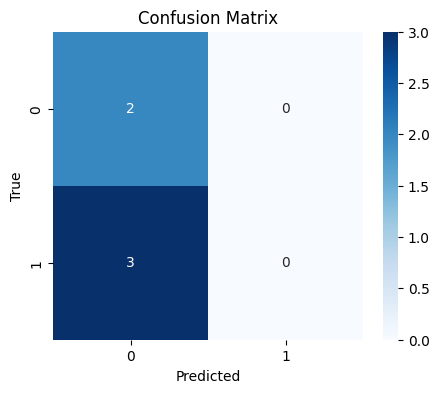

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")  # d means Formats the annotations as integers
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
# Print accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


Accuracy: 0.40


In [16]:
# Sample prediction
def predict_sentiment(text):
    tokenized = tokenizer.texts_to_sequences([text])
    tokenized = pad_sequences(tokenized, maxlen=max_length, padding='post')
    prediction = model.predict(tokenized)
    sentiment = 'positive' if prediction > 0.5 else 'negative'
    print(f'Sentiment: {sentiment}')

In [17]:
# Example usage with synthetic text
sample_review = "I hate this product"
predict_sentiment(sample_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
Sentiment: negative


In [18]:
!pip install shap

In [22]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import shap
from keras.datasets import imdb

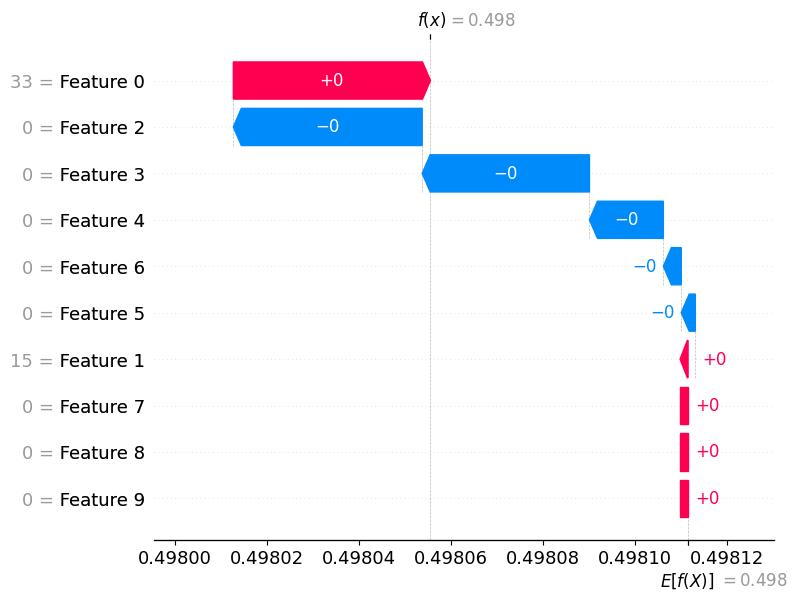

In [21]:
# Use shap.Explainer for the Keras model
explainer = shap.Explainer(model, x_train)

# Calculate SHAP values for a sample from the test set
shap_values = explainer(x_test)

# Visualize the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])